In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
data = pd.read_csv('Country-data.csv')



Feature Description

    country: Name of the country

    child_mort: Death of children under 5 years of age per 1000 live births

    exports: Exports of goods and services per capita. Given as %age of the GDP per capita

    health: Total health spending per capita. Given as %age of GDP per capita

    imports: Imports of goods and services per capita. Given as %age of the GDP per capita

    Income: Net income per person

    Inflation: The measurement of the annual growth rate of the Total GDP

    life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

    total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same

    gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population



In [3]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
#Checking for null values and duplicates
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


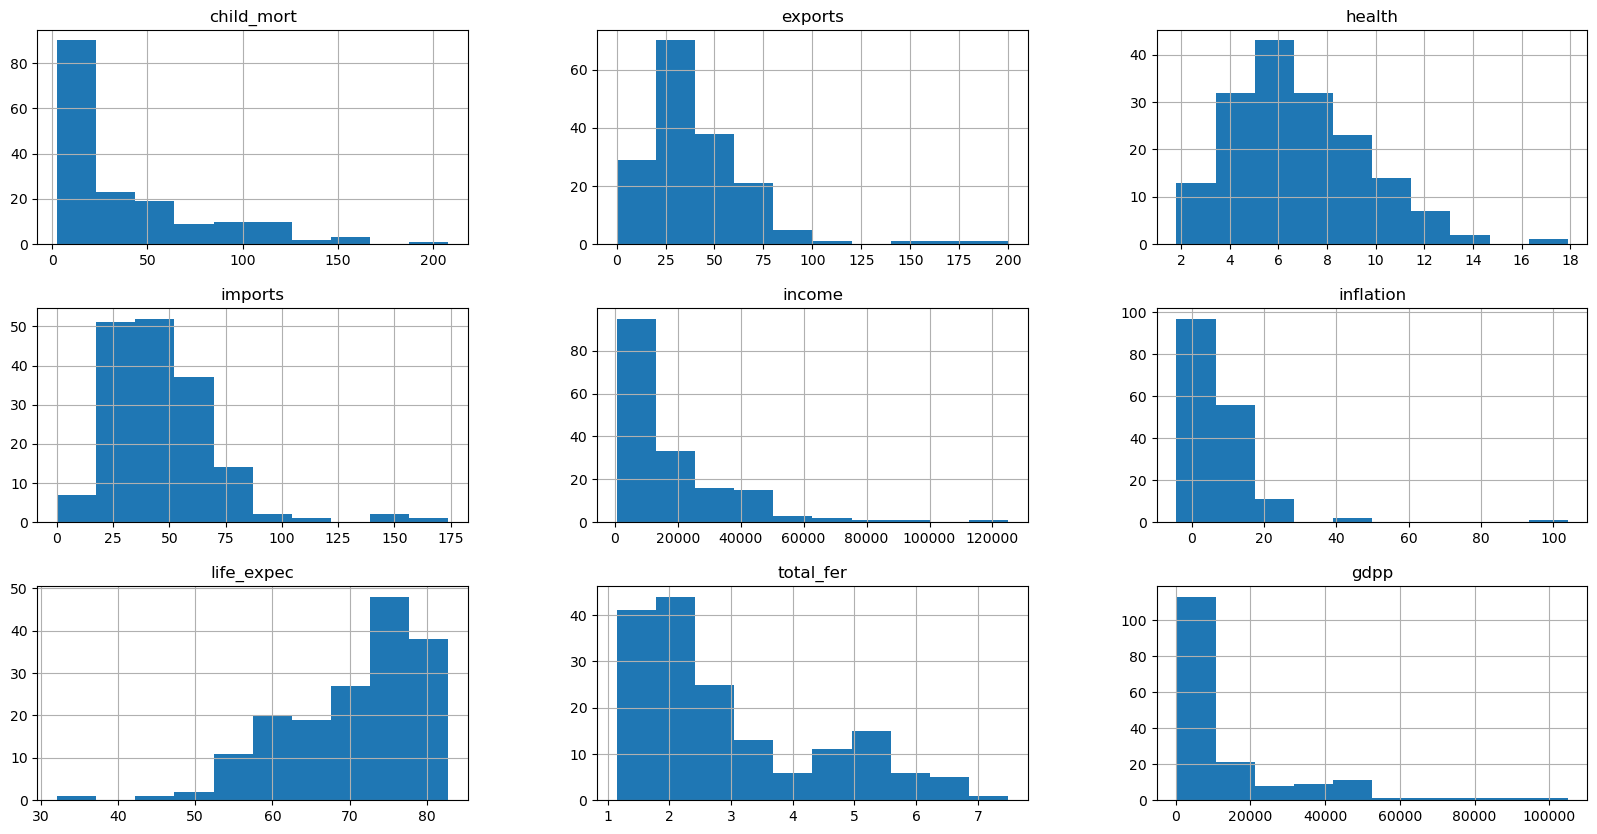

In [8]:
# Overview of data using histograms
data.hist(figsize=(20,10))
plt.show()

<Axes: >

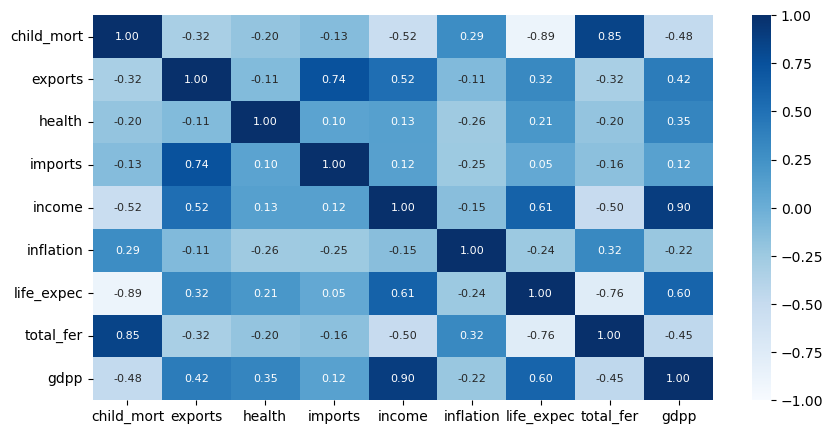

In [9]:
# Correlation heatmap
data_corr = data.drop('country', axis=1)
plt.figure(figsize=(10, 5))
sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, cmap="Blues", annot=True, fmt=".2f", annot_kws={'size': 8}) 

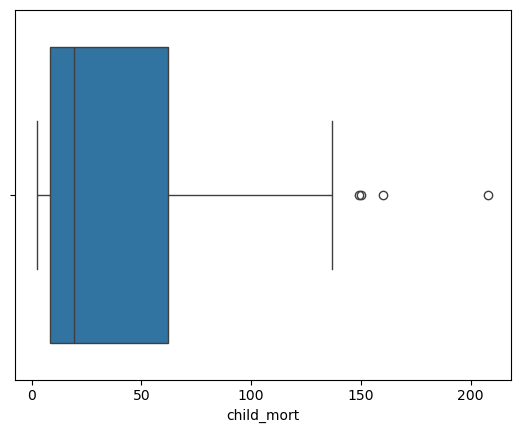

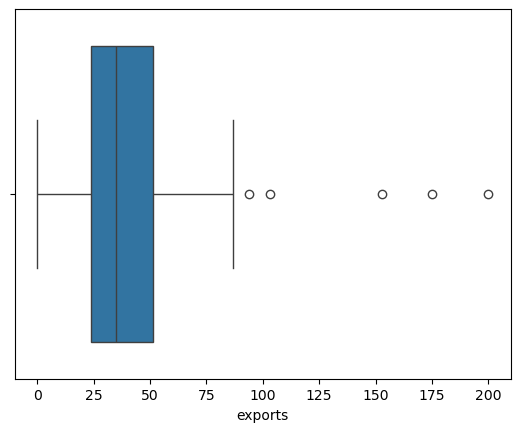

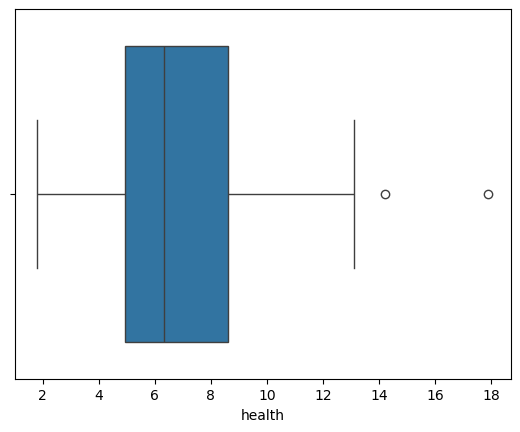

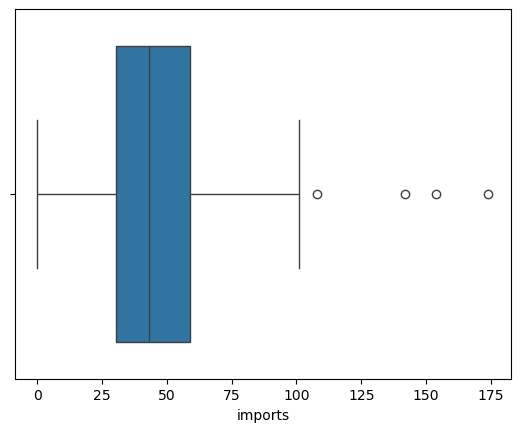

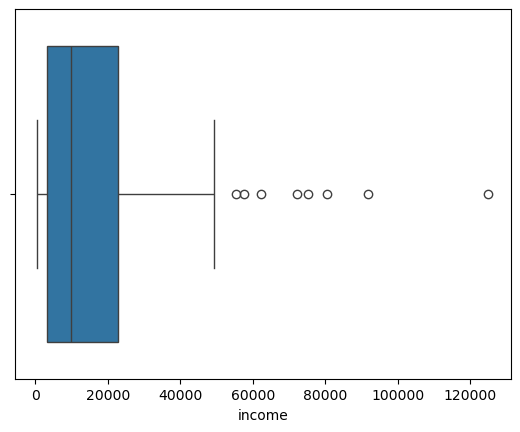

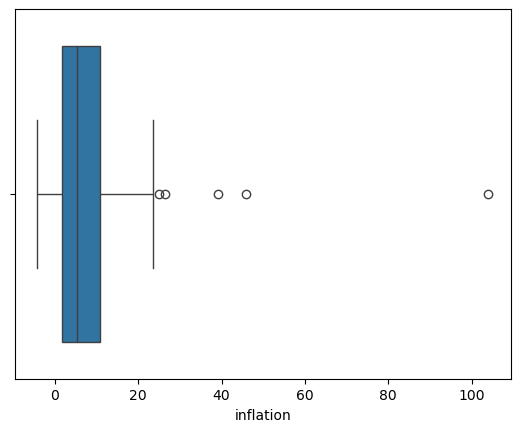

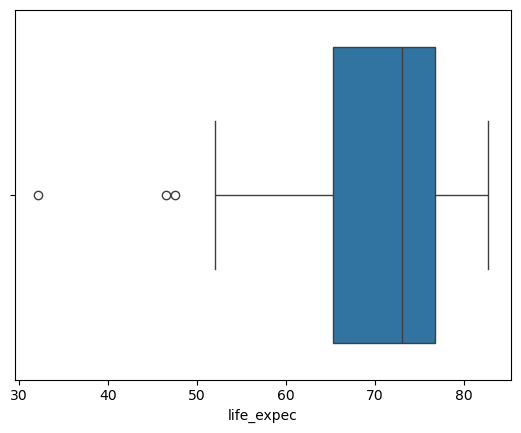

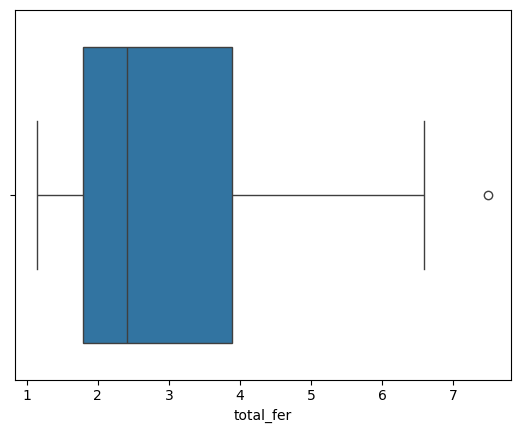

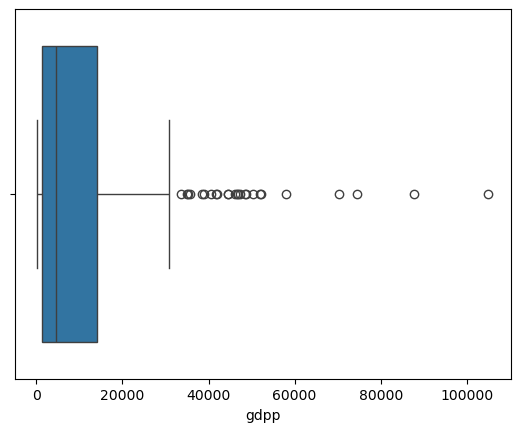

In [10]:
# Boxplots of all numerical features
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for column in columns:
    sns.boxplot(data, x=data[column])
    plt.show()

In [11]:
# Using standard scaler
data_new = data.drop('country', axis=1)
s_scaler = StandardScaler()
data_scaling1 = s_scaler.fit_transform(data_new)
df_standard = pd.DataFrame(data_scaling1, columns=columns)
df_standard

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [12]:
# Using MinMaxScaler to normalize data
minmax_scaler = MinMaxScaler()
data_scaling2 = minmax_scaler.fit_transform(data_new)
df_minmax = pd.DataFrame(data_scaling2, columns=columns)
df_minmax

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [13]:
# PCA for standard scaled data
pca = PCA()
pca.fit(df_standard)
df_pca_standard = pca.transform(df_standard)
percent_variance_standard = pca.explained_variance_ratio_
columns_pca = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [14]:
# PCA for MinMaxScaler data
pca = PCA()
pca.fit(df_minmax)
df_pca_minmax = pca.transform(df_minmax)
percent_variance_minmax = pca.explained_variance_ratio_
columns_pca = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [15]:
# Dataframe for standard scaled data
data_pca_standard = pd.DataFrame(df_pca_standard, columns=columns_pca)
data_pca_standard

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


In [16]:
# Dataframe for Min Max Scaled data
data_pca_minmax = pd.DataFrame(df_pca_minmax, columns=columns_pca)
data_pca_minmax

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646,0.115254,-0.003232,-0.065701
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515,0.005521,0.056038,-0.036459
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237,-0.039743,-0.006124,-0.017780
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254,0.012519,0.014231,-0.011441


Text(0.5, 1.0, 'PCA')

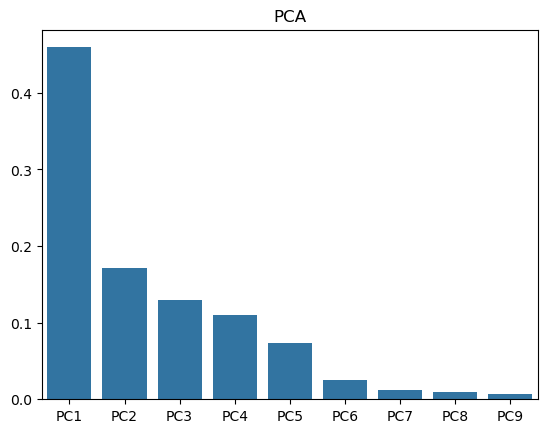

In [17]:
# PCA plot
sns.barplot(x=columns_pca, y=percent_variance_standard)
plt.title("PCA")

Text(0.5, 1.0, 'PCA')

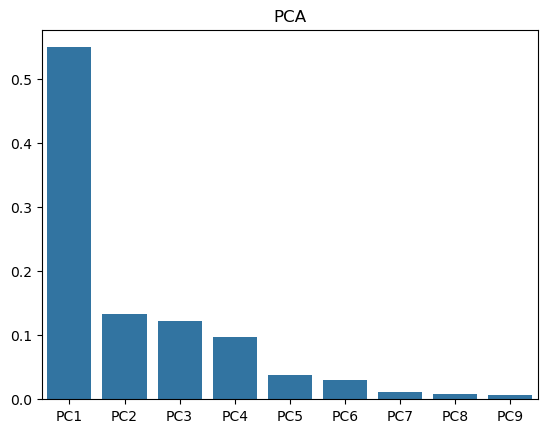

In [18]:
# PCA plot
sns.barplot(x=columns_pca, y=percent_variance_minmax)
plt.title("PCA")

In [19]:
# Leaving only up to PC5 as this is enough features to represent enough of the data
standard_pca_data = data_pca_standard.drop(['PC6', 'PC7', 'PC8', 'PC9'], axis=1)
standard_pca_data

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


In [20]:
minmax_pca_data = data_pca_minmax.drop(['PC6', 'PC7', 'PC8', 'PC9'], axis=1)
minmax_pca_data

,PC1,PC2,PC3,PC4,PC5
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799
...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550


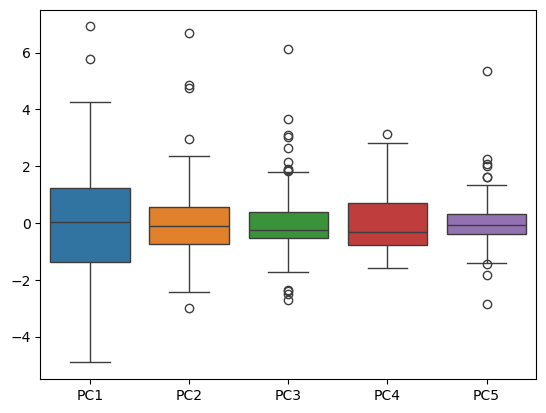

In [21]:
sns.boxplot(data=standard_pca_data)
plt.show()

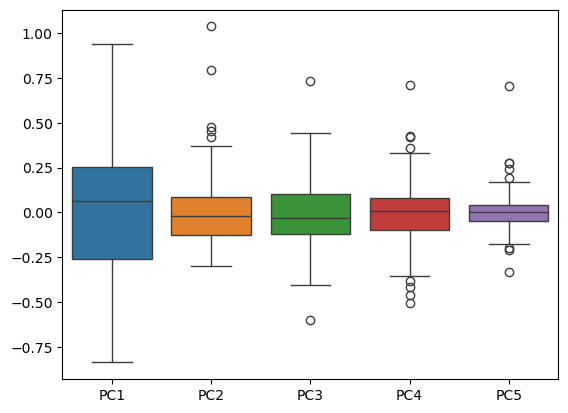

In [22]:
sns.boxplot(data=minmax_pca_data)
plt.show()

c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

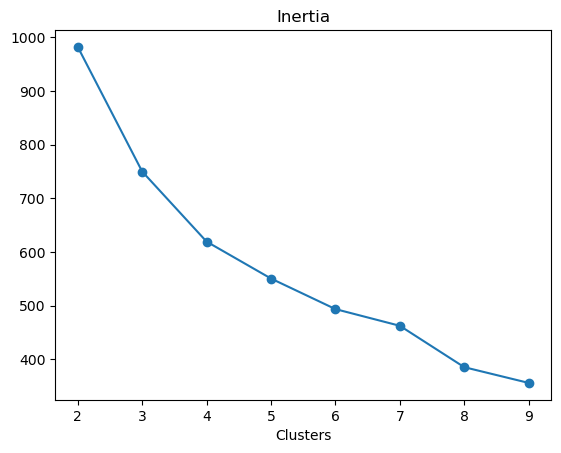

In [23]:
# Kmeans and silhouette score for standard scaler data
inertia_standard = []
silhouette_standard = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(standard_pca_data)
    inertia_standard.append(kmeans.inertia_)

    s_score = silhouette_score(standard_pca_data, kmeans.labels_, random_state=42)
    silhouette_standard.append(s_score)

plt.plot(range(2, 10), inertia_standard, marker='o')
plt.title("Inertia")
plt.xlabel("Clusters")
plt.show()




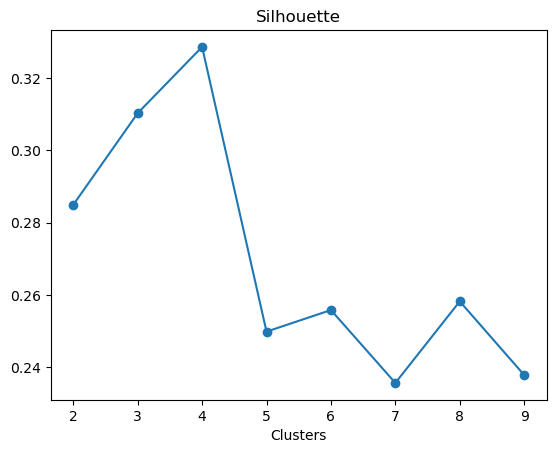

In [24]:
plt.plot(range(2, 10), silhouette_standard, marker='o')
plt.title("Silhouette")
plt.xlabel("Clusters")

plt.show()

c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

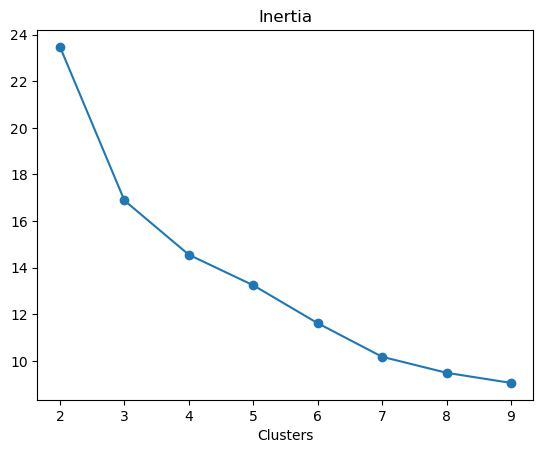

In [25]:
# Kmeans and silhouete score for MinMaxScaler data
inertia_minmax = []
silhouette_minmax = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(minmax_pca_data)
    inertia_minmax.append(kmeans.inertia_)

    sil_score = silhouette_score(minmax_pca_data, kmeans.labels_, random_state=42)
    silhouette_minmax.append(sil_score)

plt.plot(range(2, 10), inertia_minmax, marker='o')
plt.title("Inertia")
plt.xlabel("Clusters")
plt.show()

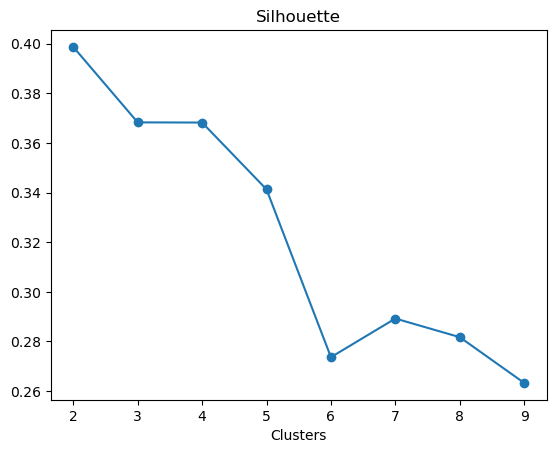

In [26]:
plt.plot(range(2, 10), silhouette_minmax, marker='o')
plt.title("Silhouette")
plt.xlabel("Clusters")
plt.show()

In [27]:
# 3 cluster seems like the right number based on the previous plots
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(minmax_pca_data)

c:\Users\Alex\anaconda3\envs\env311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
# Adding cluster feature to original data
data['cluster'] = kmeans_final.labels_
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [29]:
data.query('cluster == 2')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


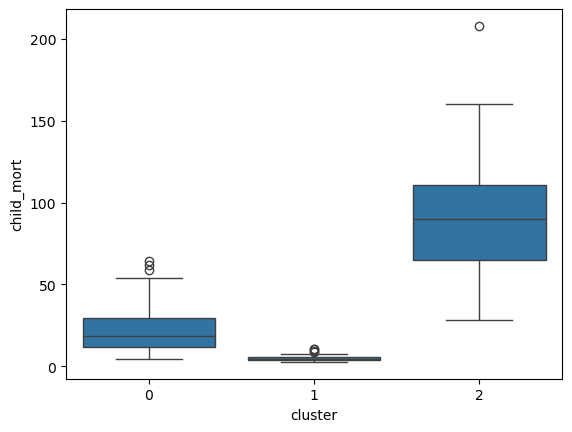

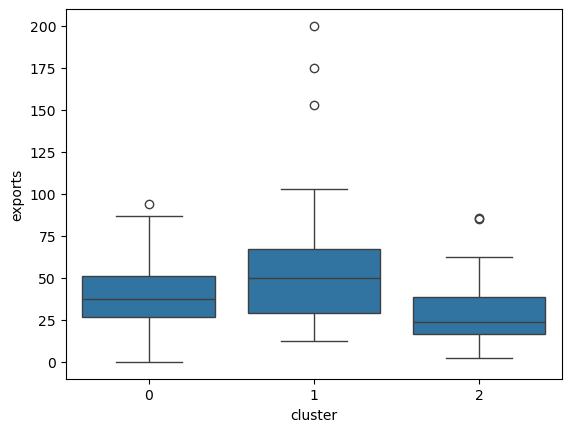

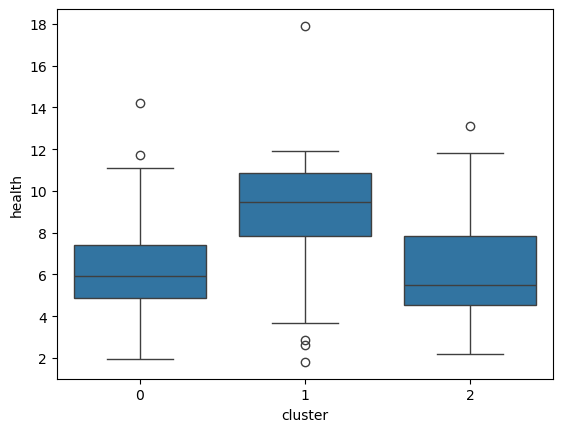

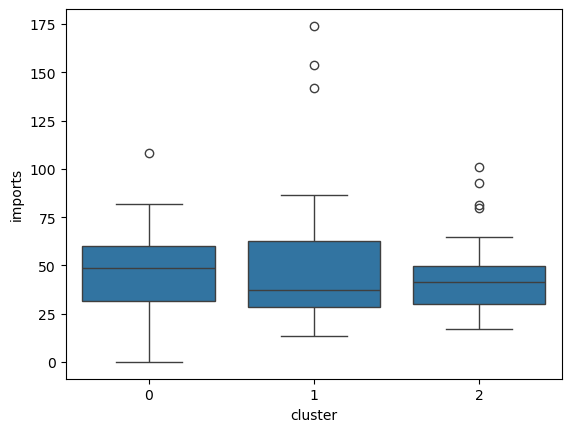

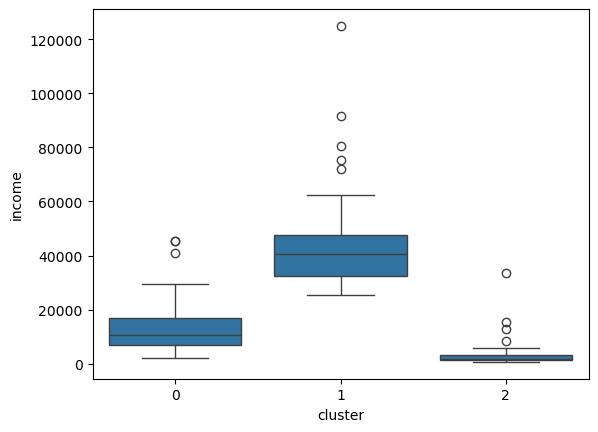

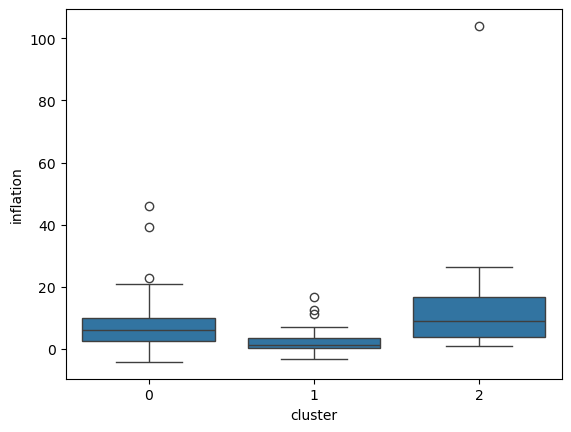

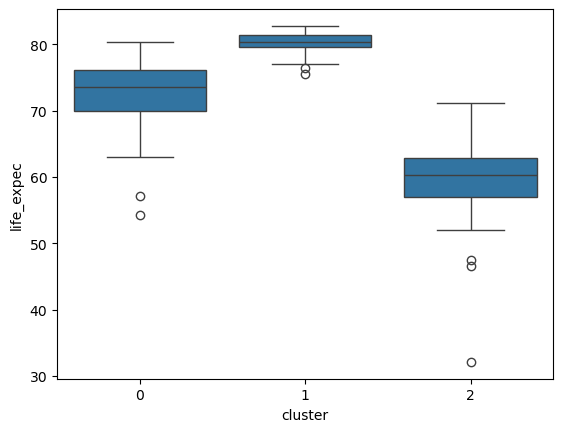

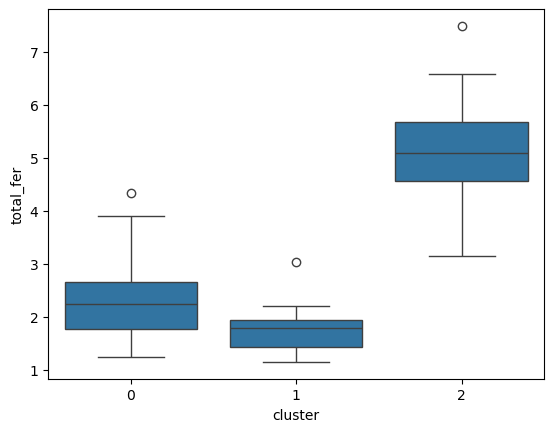

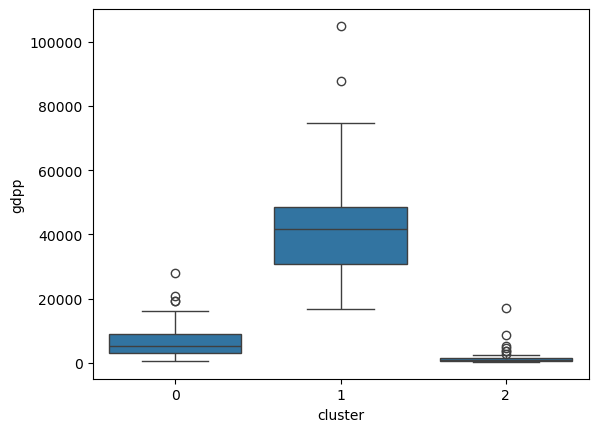

In [30]:
# Differentiating clusters based on boxplots
for column in columns:
    sns.boxplot(data=data, x='cluster', y=column)
    plt.show()

In [31]:
# Adding a new feature differentiating the clusters for more clarity with different priority levels
cluster_priority_map = {0: 'Medium Priority', 1: 'High Priority', 2: 'Low Priority'}

data['priority'] = data['cluster'].map(cluster_priority_map)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,priority
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,Low Priority
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Medium Priority
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Medium Priority
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,Low Priority
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Medium Priority
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Medium Priority
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Medium Priority
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Medium Priority
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,Low Priority


In [32]:
fig = px.choropleth(data[['country','priority']], 
                    locationmode = 'country names', 
                    locations = 'country', 
                    color = data['priority'], 
                    color_discrete_map = {'High Priority':'Red', 'Medium Priority':'Blue', 'Low Priority':'Green'})

fig.show()